In [17]:
import pandas as pd

# Load datasets
crop_yield = pd.read_csv("crop_yield.csv")
data_after_rainfall = pd.read_csv("Data_after_rainfall.csv")
fertilizer = pd.read_csv("Fertilizer.csv")
final_temp_dataset = pd.read_csv("Final_Dataset_after_temperature.csv")

# Inspect the first few rows of each dataset
print("Crop Yield Data:")
print(crop_yield.head(), "\n")

print("Data After Rainfall:")
print(data_after_rainfall.head(), "\n")

print("Fertilizer Data:")
print(fertilizer.head(), "\n")

print("Final Dataset After Temperature:")
print(final_temp_dataset.head(), "\n")


Crop Yield Data:
                    State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                  Crop    Area  Production  
0             Arecanut  1254.0      2000.0  
1  Other Kharif pulses     2.0         1.0  
2                 Rice   102.0       321.0  
3               Banana   176.0       641.0  
4            Cashewnut   720.0       165.0   

Data After Rainfall:
       State_Name Crop_Type          Crop  rainfall  Area_in_hectares  \
0  andhra pradesh    kharif     Arhar/Tur    654.34           21400.0   
1  andhra pradesh    kharif         Bajra    654.34            1400.0   
2  andhra pradesh    kharif   Castor s

In [18]:
# Check unique values in the 'State_Name' and 'Crop' columns of each dataset
'''print("Crop Yield State Names and Crops:")
print(crop_yield[['State_Name', 'Crop']].drop_duplicates(), "\n")

print("Data After Rainfall State Names and Crops:")
print(data_after_rainfall[['State_Name', 'Crop']].drop_duplicates(), "\n")

print("Fertilizer State Names and Crops:")
print(fertilizer[['Crop']].drop_duplicates(), "\n")

print("Final Temp Dataset State Names and Crops:")
print(final_temp_dataset[['State_Name', 'Crop']].drop_duplicates(), "\n")'''


'print("Crop Yield State Names and Crops:")\nprint(crop_yield[[\'State_Name\', \'Crop\']].drop_duplicates(), "\n")\n\nprint("Data After Rainfall State Names and Crops:")\nprint(data_after_rainfall[[\'State_Name\', \'Crop\']].drop_duplicates(), "\n")\n\nprint("Fertilizer State Names and Crops:")\nprint(fertilizer[[\'Crop\']].drop_duplicates(), "\n")\n\nprint("Final Temp Dataset State Names and Crops:")\nprint(final_temp_dataset[[\'State_Name\', \'Crop\']].drop_duplicates(), "\n")'

In [19]:
# Clean the 'State_Name' and 'Crop' columns by stripping whitespace and converting to lowercase
crop_yield['State_Name'] = crop_yield['State_Name'].str.strip().str.lower()
crop_yield['Crop'] = crop_yield['Crop'].str.strip().str.lower()


In [20]:
data_after_rainfall['State_Name'] = data_after_rainfall['State_Name'].str.strip().str.lower()
data_after_rainfall['Crop'] = data_after_rainfall['Crop'].str.strip().str.lower()

fertilizer['Crop'] = fertilizer['Crop'].str.strip().str.lower()

final_temp_dataset['State_Name'] = final_temp_dataset['State_Name'].str.strip().str.lower()
final_temp_dataset['Crop'] = final_temp_dataset['Crop'].str.strip().str.lower()



In [21]:
# Downcast columns to more efficient data types
crop_yield['Area'] = pd.to_numeric(crop_yield['Area'], downcast='float')
crop_yield['Production'] = pd.to_numeric(crop_yield['Production'], downcast='float')

data_after_rainfall['rainfall'] = pd.to_numeric(data_after_rainfall['rainfall'], downcast='float')
data_after_rainfall['Area_in_hectares'] = pd.to_numeric(data_after_rainfall['Area_in_hectares'], downcast='float')
data_after_rainfall['Production_in_tons'] = pd.to_numeric(data_after_rainfall['Production_in_tons'], downcast='float')

fertilizer['N'] = pd.to_numeric(fertilizer['N'], downcast='float')
fertilizer['P'] = pd.to_numeric(fertilizer['P'], downcast='float')
fertilizer['K'] = pd.to_numeric(fertilizer['K'], downcast='float')
fertilizer['pH'] = pd.to_numeric(fertilizer['pH'], downcast='float')

final_temp_dataset['rainfall'] = pd.to_numeric(final_temp_dataset['rainfall'], downcast='float')
final_temp_dataset['temperature'] = pd.to_numeric(final_temp_dataset['temperature'], downcast='float')
final_temp_dataset['Area_in_hectares'] = pd.to_numeric(final_temp_dataset['Area_in_hectares'], downcast='float')
final_temp_dataset['Production_in_tons'] = pd.to_numeric(final_temp_dataset['Production_in_tons'], downcast='float')


In [22]:
# Take a sample of the data (e.g., 10% of the original data)
crop_yield_sample = crop_yield.sample(frac=0.1, random_state=42)
data_after_rainfall_sample = data_after_rainfall.sample(frac=0.1, random_state=42)
fertilizer_sample = fertilizer.sample(frac=0.1, random_state=42)
final_temp_dataset_sample = final_temp_dataset.sample(frac=0.1, random_state=42)

# Now, try the merging process with the smaller data
merged_data = crop_yield_sample.merge(data_after_rainfall_sample, on=["State_Name", "Crop"], how="inner")
merged_data = merged_data.merge(fertilizer_sample, on="Crop", how="inner")
merged_data = merged_data.merge(final_temp_dataset_sample, on=["State_Name", "Crop"], how="inner")

# Inspect the merged dataset
print(merged_data.head())


       State_Name District_Name  Crop_Year       Season     Crop   Area  \
0  madhya pradesh       GWALIOR       2003  Whole Year   brinjal  194.0   
1  madhya pradesh       GWALIOR       2003  Whole Year   brinjal  194.0   
2  madhya pradesh       GWALIOR       2003  Whole Year   brinjal  194.0   
3  madhya pradesh       GWALIOR       2003  Whole Year   brinjal  194.0   
4  madhya pradesh       GWALIOR       2003  Whole Year   brinjal  194.0   

   Production Crop_Type_x   rainfall_x  Area_in_hectares_x  ...     P     K  \
0         0.0  whole year  1111.680054               100.0  ...  15.0  40.0   
1         0.0  whole year  1111.680054               100.0  ...  15.0  40.0   
2         0.0  whole year  1111.680054               100.0  ...  15.0  40.0   
3         0.0  whole year  1111.680054               100.0  ...  15.0  40.0   
4         0.0  whole year  1111.680054               100.0  ...  15.0  40.0   

     pH  Crop_Type_y   rainfall_y  temperature  Area_in_hectares_y  \
0  6

In [23]:
# Check for missing values in the merged dataset
missing_values = merged_data.isnull().sum()
print("Missing values in each column:\n", missing_values)



Missing values in each column:
 State_Name                     0
District_Name                  0
Crop_Year                      0
Season                         0
Crop                           0
Area                           0
Production                 47699
Crop_Type_x                    0
rainfall_x                     0
Area_in_hectares_x             0
Production_in_tons_x           0
Yield_ton_per_hec_x            0
Unnamed: 7              22465438
Unnamed: 0                     0
N                              0
P                              0
K                              0
pH                             0
Crop_Type_y                    0
rainfall_y                     0
temperature                    0
Area_in_hectares_y             0
Production_in_tons_y           0
Yield_ton_per_hec_y            0
Unnamed: 8              22465438
dtype: int64


In [24]:
# Select features and target variable
X = merged_data[['Crop', 'Season', 'rainfall_x', 'temperature', 'Area_in_hectares_x']]  # Features
y = merged_data['Yield_ton_per_hec_y']  # Target variable

# Check the first few rows of the selected features and target
print(X.head())
print(y.head())


      Crop       Season   rainfall_x  temperature  Area_in_hectares_x
0  brinjal  Whole Year   1111.680054    28.648182               100.0
1  brinjal  Whole Year   1111.680054    28.648182               100.0
2  brinjal  Whole Year   1111.680054    28.648182               100.0
3  brinjal  Whole Year   1111.680054    28.648182               100.0
4  brinjal  Whole Year   1111.680054    28.648182               100.0
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Yield_ton_per_hec_y, dtype: float64


In [25]:
# One-hot encoding categorical columns
X = pd.get_dummies(X, columns=['Crop', 'Season'])


In [26]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")


Training data shape: (17972350, 34), Test data shape: (4493088, 34)


In [27]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=42)

# Train the model
regressor.fit(X_train, y_train)

print("Model training completed!")


Model training completed!


In [28]:
# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Print a few predictions and corresponding actual values
print("Predictions:", y_pred[:5])
print("Actual values:", y_test[:5].values)


Predictions: [ 2.18871176  2.23352747 13.00458768 21.67574844 12.58254084]
Actual values: [ 1.9648847   2.5        14.70285714 24.85731683 13.86666667]


In [29]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate R² score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 1.2582848765430736
R² Score: 0.8972288720744015


In [30]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 2.5351700905616767


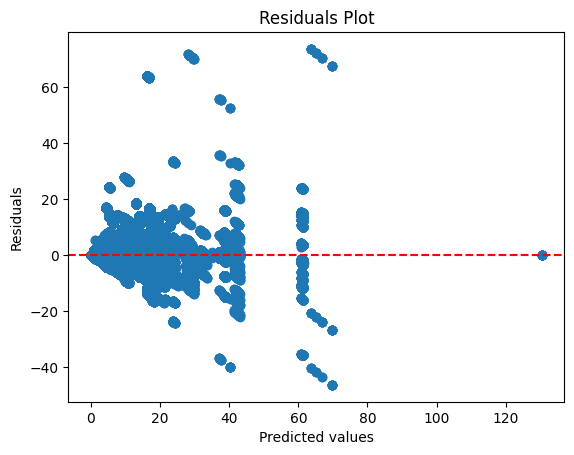

In [31]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()


In [32]:
import joblib

# Save the model to a file
joblib.dump(regressor, 'crop_yield_predictor_model.pkl')

# Or if you used a tuned model
# joblib.dump(best_regressor, 'tuned_crop_yield_predictor_model1.pkl')

print("Model saved successfully!")


Model saved successfully!
